In [1]:
import os, glob
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import fitsio
import numpy as np
import drms
import matplotlib.colors as colors
import sunpy.visualization.colormaps as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
aia193 = matplotlib.colormaps['sdoaia193']
os.getcwd()

'/mnt/data2/dev/AIASpikes2/notebooks'

In [9]:
images_dir = os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'images_10m', '2010', '07', '25')

In [88]:
def make_2dhist(wavelength, density=True):
    spikes_dir = os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'spikes')
    sp_fits = sorted(glob.glob(os.path.join(spikes_dir, '2010', '07', '25', f'2010-07-25T18:*{wavelength:04d}.spikes.fits')))
    sp_data = [fitsio.read(f) for f in sp_fits]
    sp_data = np.concatenate(sp_data, axis=1)
    print('spikes info: ', len(sp_fits), len(sp_data), sp_data.shape)
    x = sp_data[0, ...]%4096
    y = sp_data[0, ...]//4096
    xbinedges = np.arange(0, 4095, 35)
    ybinedges = xbinedges
    hdata, _, _ = np.histogram2d(x, y, bins=(xbinedges, ybinedges), density=density)
    return hdata

In [12]:
def rescale_171(image):
    image = image.copy() - 5
    image[image < 0.1] = 0.1
    image = np.sqrt(image)    
    return image

In [109]:
w = 171
spikes_dir = os.path.join(os.environ['DATA'], 'SDO', 'AIA', 'spikes')
sp_fits = sorted(glob.glob(os.path.join(spikes_dir, '2010', '07', '25', f'2010-07-25T18:*{w:04d}.spikes.fits')))

sp_sample = fitsio.read(sp_fits[0])
sp_sample.shape
x = sp_sample[0, :]%4096
y = sp_sample[0, :]//4096

im_fits = sorted(glob.glob(os.path.join(images_dir, f'aia*Z.{str(w)}*.fits')))
nim = len(im_fits)
aia_image, header = fitsio.read(im_fits[int(nim/2)], header=True)
aia_image[aia_image<0] = 0

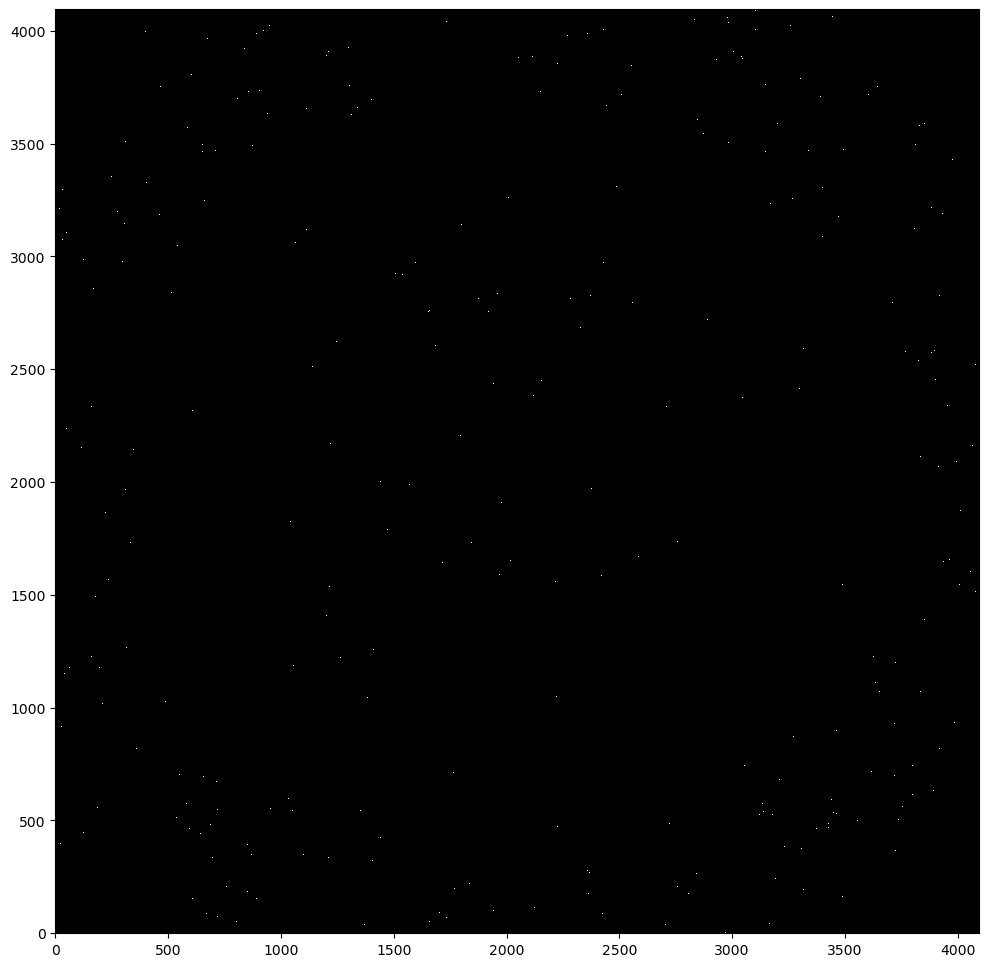

In [58]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(spiked_image, vmin=0, vmax=1, origin='lower', cmap='gray', interpolation='nearest')
# plt.plot(y, x, marker='.', linestyle='none')

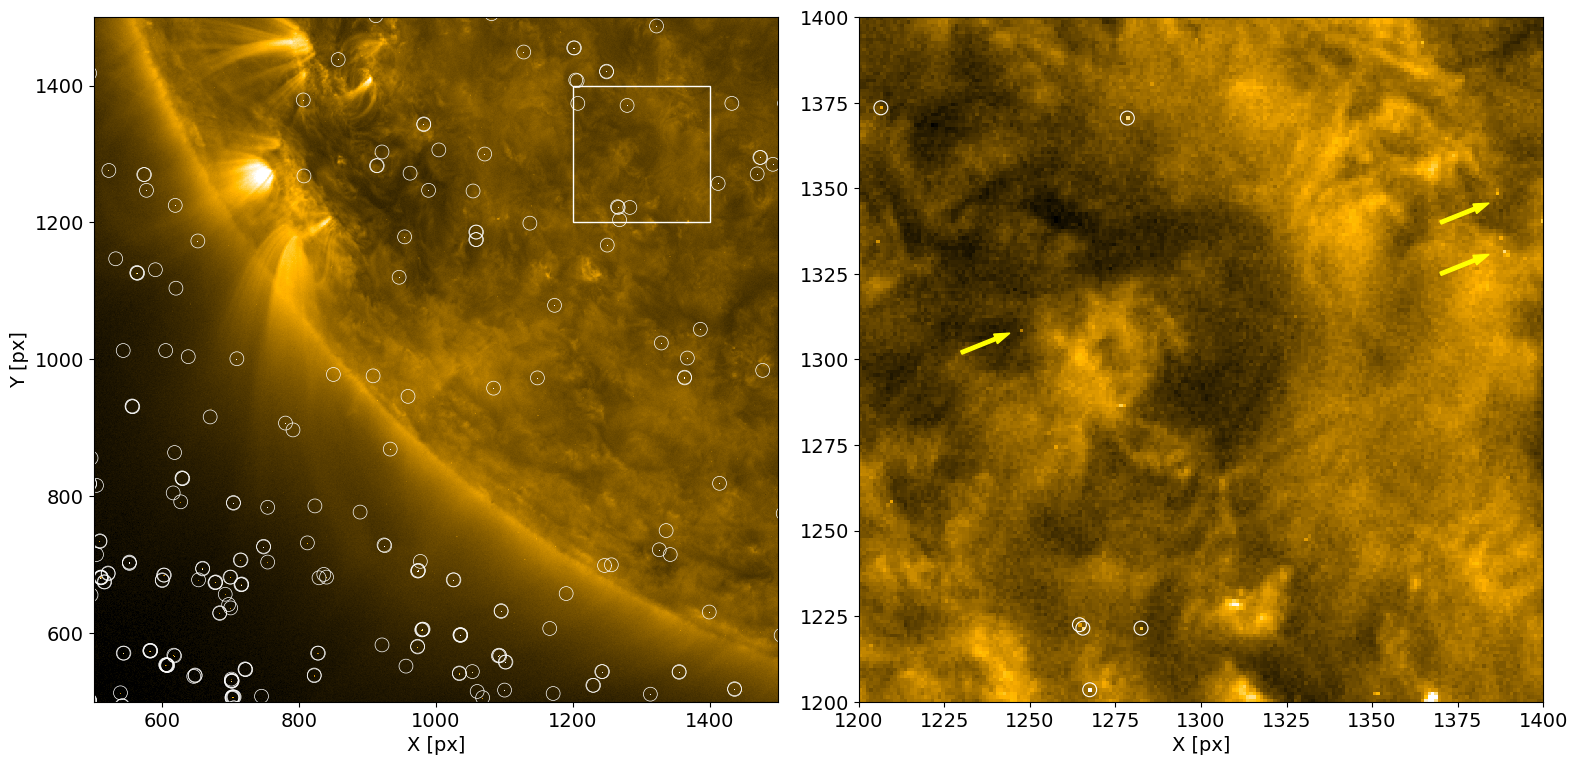

In [190]:
spiked_image = aia_image.copy() # np.zeros(aia_image.shape)
spiked_image[y, x] = sp_sample[1,:]*10

vmin, vmax = 1, 1800
aia1 = rescale_171(aia_image/header['EXPTIME'])
aia2 = rescale_171(spiked_image/header['EXPTIME'])
cmap = matplotlib.colormaps['sdoaia171']
fov1 = [500, 1500, 500, 1500]
fov2 = [1200, 1400, 1200,1400]

plt.rcParams.update({'font.size':14})

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
# im1 = axs[0].imshow(aia1[fov1[2]:fov1[3], fov1[0]:fov1[1]], extent=fov1, vmin=aia1.min(), vmax=40, origin='lower', cmap=cmap, interpolation='nearest')
# axs[0].set_xlabel('X [px]')
# axs[0].set_ylabel('Y [px]')
im2 = axs[0].imshow(aia2[fov1[2]:fov1[3], fov1[0]:fov1[1]], extent=fov1, vmin=aia2.min(), vmax=40, origin='lower', cmap=cmap, interpolation='nearest')
axs[0].add_patch(Rectangle((fov2[2], fov2[0]), 200, 200,color="white", fill=False))
axs[0].set_xlabel('X [px]')
axs[0].set_ylabel('Y [px]')
axs[0].scatter(x+1, y+1, marker='o', facecolors='none', edgecolors='white', linewidth=0.5, s=100)
axs[0].set_xlim([500, 1500])
axs[0].set_ylim([500, 1500])

im3 = axs[1].imshow(aia3[fov2[2]:fov2[3], fov2[0]:fov2[1]], extent=[fov2[0], fov2[1], fov2[2], fov2[3]], origin='lower', vmax=20, cmap=cmap, interpolation='nearest')
axs[1].set_xlabel('X [px]')
axs[1].scatter(x+0.5, y+0.5, marker='o', facecolors='none', edgecolors='white', linewidth=0.8, s=100)
axs[1].set_xlim([fov2[0], fov2[1]])
axs[1].set_ylim([fov2[2], fov2[3]])
plt.arrow(1230, 1302, 10, 4, width=1, color='yellow')
plt.arrow(1370, 1325, 10, 4, width=1, color='yellow')
plt.arrow(1370, 1340, 10, 4, width=1, color='yellow')
# axs[1].scatter(x, y, marker='o', facecolors='none', edgecolors='white', linewidth=0.5)
# axs[1].set_xlim([500, 1500])
# axs[1].set_ylim([500, 1500])
plt.tight_layout()
plt.savefig('f19_figure_raphael', dpi=180)

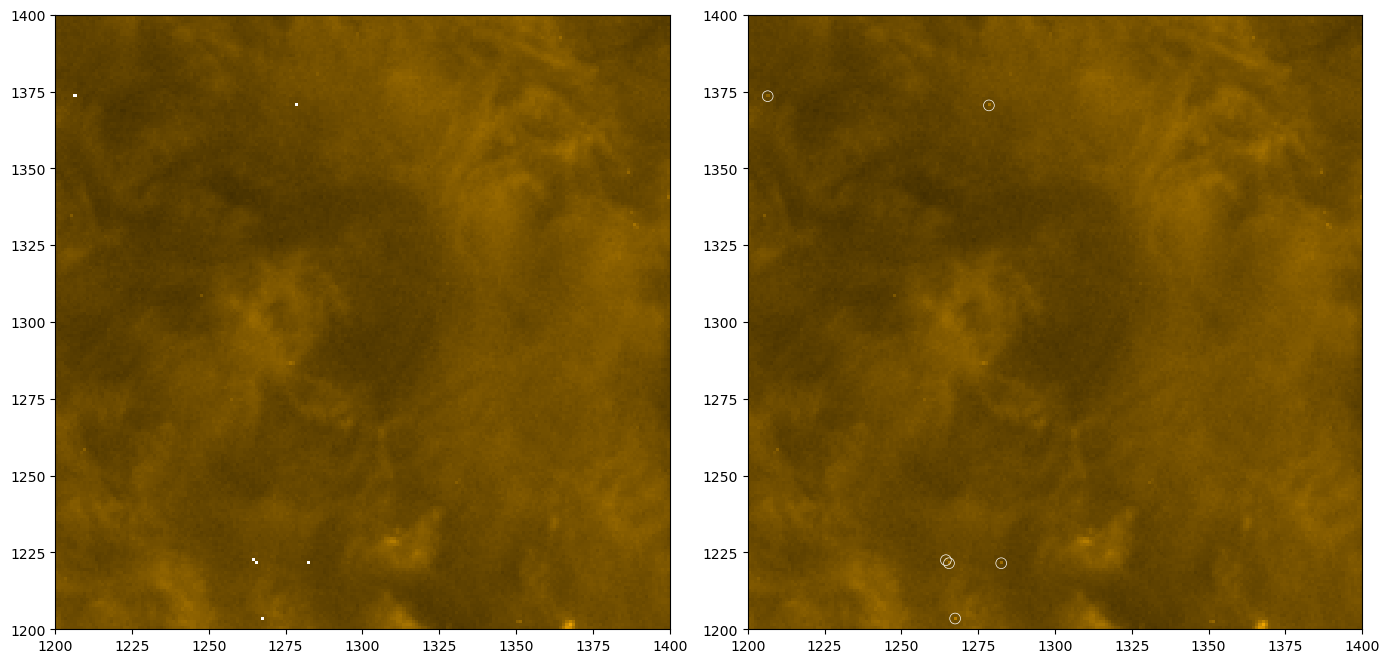

In [146]:
spiked_image[y, x] = sp_sample[1,:]

vmin, vmax = 1, 1800
aia3 = rescale_171(spiked_image/header['EXPTIME'])
cmap = matplotlib.colormaps['sdoaia171']


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
im1 = axs[0].imshow(aia2[fov2[2]:fov2[3], fov2[0]:fov2[1]], extent=[fov2[0], fov2[1], fov2[2], fov2[3]], vmin=1, vmax=40, origin='lower', cmap=cmap, interpolation='nearest')
im2 = axs[1].imshow(aia3[fov2[2]:fov2[3], fov2[0]:fov2[1]], extent=[fov2[0], fov2[1], fov2[2], fov2[3]], vmin=1, vmax=40, origin='lower', cmap=cmap, interpolation='nearest')
axs[1].scatter(x+0.5, y+0.5, marker='o', facecolors='none', edgecolors='white', linewidth=0.5, s=60)
axs[1].set_xlim([fov2[0], fov2[1]])
axs[1].set_ylim([fov2[2], fov2[3]])
plt.tight_layout()

In [92]:
wavel = [94,131,171,193,211,304,335]
heatmaps = {}

for w in wavel:
    hist2d = make_2dhist(w, density=False)
    hist2dpdf = make_2dhist(,w, density=True)
    aia_image = aia1
    heatmaps[str(w)] = {'hist2d':hist2d.T, 'hist2dpdf':hist2dpdf.T, 'x':x, 'y':y, 'image':aia_image, 'header':header, 'cmap':matplotlib.colormaps[f'sdoaia{w}']}

spikes info:  300 3 (3, 10584467)
spikes info:  300 3 (3, 10584467)
spikes info:  300 3 (3, 9528707)
spikes info:  300 3 (3, 9528707)
spikes info:  300 3 (3, 2606886)
spikes info:  300 3 (3, 2606886)
spikes info:  300 3 (3, 2843908)
spikes info:  300 3 (3, 2843908)
spikes info:  300 3 (3, 5273536)
spikes info:  300 3 (3, 5273536)
spikes info:  300 3 (3, 11786256)
spikes info:  300 3 (3, 11786256)
spikes info:  300 3 (3, 15026679)
spikes info:  300 3 (3, 15026679)


171 linear scale


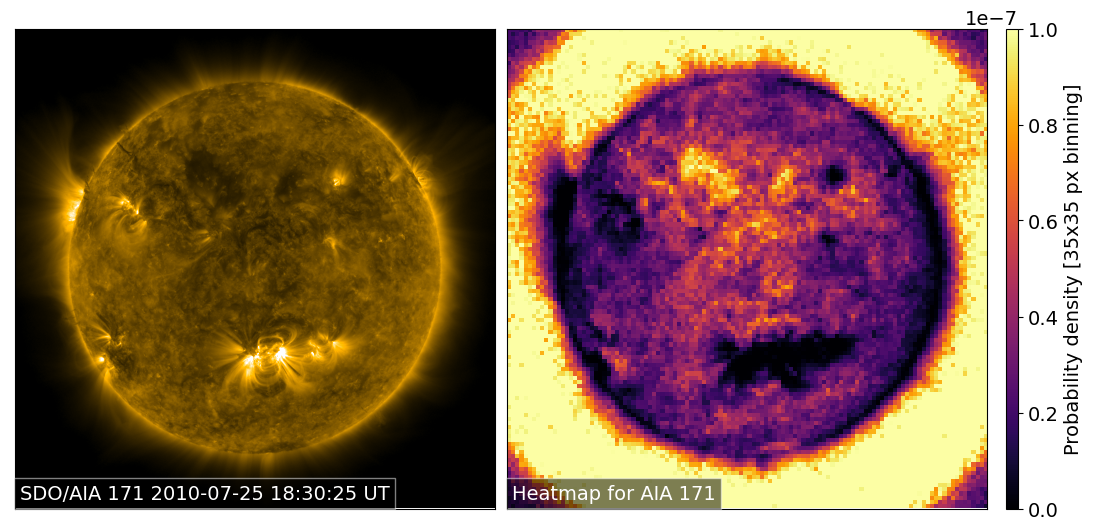

In [13]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from astropy.visualization import (MinMaxInterval, SqrtStretch,ImageNormalize)

plt.close('all')
%matplotlib inline
plt.rcParams.update({'font.size':14})

for w in wavel[2:3]:
    heatmap = heatmaps[str(w)]
    axs = []
    fig = plt.figure(figsize=(12, 6))
    axs.append(fig.add_axes([0.05, 0.1, 0.4, 0.8]))
    axs.append(fig.add_axes([0.46, 0.1, 0.4, 0.8]))
    if w in [94, 131, 193, 211, 304, 335]: # logarithmic colormap
        print(f'{w} log scale')
        if w == 94: 
            vmin, vmax = 0.3, 20
        elif w == 131:
            vmin, vmax = 0.7, 500
        elif w == 193:
            vmin, vmax = 20, 2500
        elif w == 211:
            vmin, vmax = 7, 1500
        elif w == 304:
            vmin, vmax = 0.8, 250
        elif w == 335:
            vmin, vmax = 0.4, 80
        else:
            vmin = 1 #np.percentile(aia_images[6], 0.01)
            vmax = np.percentile(heatmap['image'], 99.9)
        im1 = axs[0].imshow(heatmap['image']/heatmap['header']['EXPTIME'], origin='lower', cmap=heatmap['cmap'], norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    else:
        vmin = 1 #np.percentile(aia_images[6], 0.01)
        vmax = np.percentile(heatmap['image'], 99.9)
        if w == 171:
            vmin, vmax = 1, 1800
            image = heatmap['image']/heatmap['header']['EXPTIME']
            image = image - 5
            image[image < 0.1] = 0.1
            image = np.sqrt(image)
        print(f'{w} linear scale')

#         norm = ImageNormalize(image, vmin=vmin, vmax=vmax, stretch=SqrtStretch())
#         im1 = axs[0].imshow(image, origin='lower', cmap=heatmap['cmap'], norm=norm)
        im1 = axs[0].imshow(image, vmin=1, vmax=40, origin='lower', cmap=heatmap['cmap'])
    txt1 = axs[0].text(40, 80, f"SDO/AIA {w} {heatmap['header']['T_OBS'][:-4].replace('T', ' ')} UT", color='white')
    txt1.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white'))
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    # # fig.colorbar(im1, ax=axs[0])

    pdfhvmin = 0
    pdfhvmax = 1e-7
    
    im2 = axs[1].imshow(heatmap['hist2dpdf'], origin='lower', cmap='inferno', vmin=pdfhvmin, vmax=pdfhvmax, extent=[0, 4095, 0, 4095])
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    txt2 = axs[1].text(40, 80, f'Heatmap for AIA {w}', color='white')
    txt2.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white'))
    axins = axs[1].inset_axes([1.04, 0, 0.025, 1.0])
    cb1 = fig.colorbar(im2, ax=axs[1], cax=axins, label='Probability density [35x35 px binning]')
    # plt.tight_layout()
    plt.savefig(f'spikes_heatmap_{w}_prob.png')
#     plt.close('all')


In [138]:
heatmap['x']

array([   0,   35,   70,  105,  140,  175,  210,  245,  280,  315,  350,
        385,  420,  455,  490,  525,  560,  595,  630,  665,  700,  735,
        770,  805,  840,  875,  910,  945,  980, 1015, 1050, 1085, 1120,
       1155, 1190, 1225, 1260, 1295, 1330, 1365, 1400, 1435, 1470, 1505,
       1540, 1575, 1610, 1645, 1680, 1715, 1750, 1785, 1820, 1855, 1890,
       1925, 1960, 1995, 2030, 2065, 2100, 2135, 2170, 2205, 2240, 2275,
       2310, 2345, 2380, 2415, 2450, 2485, 2520, 2555, 2590, 2625, 2660,
       2695, 2730, 2765, 2800, 2835, 2870, 2905, 2940, 2975, 3010, 3045,
       3080, 3115, 3150, 3185, 3220, 3255, 3290, 3325, 3360, 3395, 3430,
       3465, 3500, 3535, 3570, 3605, 3640, 3675, 3710, 3745, 3780, 3815,
       3850, 3885, 3920, 3955, 3990, 4025, 4060])

In [36]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
plt.rcParams.update({'font.size':14})
max193 = heatmaps['193']['hist2d'].max()

for w in wavel:
    heatmap = heatmaps[str(w)]
    vmin = 1 #np.percentile(aia_images[6], 0.01)
    vmax = np.percentile(heatmap['image'], 99.8)
    axs = []
    fig = plt.figure(figsize=(12, 6))
    axs.append(fig.add_axes([0.05, 0.1, 0.4, 0.8]))
    axs.append(fig.add_axes([0.46, 0.1, 0.4, 0.8]))
    im1 = axs[0].imshow(heatmap['image'], origin='lower', cmap=heatmap['cmap'], norm=colors.LogNorm(vmin=vmin, vmax=vmax))
    txt1 = axs[0].text(40, 80, f"SDO/AIA {w} {heatmap['header']['T_OBS'][:-4].replace('T', ' ')} UT", color='white')
    txt1.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white'))
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    # # fig.colorbar(im1, ax=axs[0])

    pdfhvmin = 0
    pdfhvmax = 1e-7
    
    im2 = axs[1].imshow(heatmap['hist2dpdf'], origin='lower', cmap='inferno', vmin=pdfhvmin, vmax=pdfhvmax, extent=[0, 4095, 0, 4095])
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    txt2 = axs[1].text(40, 80, f'Heatmap for AIA {w}', color='white')
    txt2.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor='white'))
    axins = axs[1].inset_axes([1.04, 0, 0.025, 1.0])
    cb1 = fig.colorbar(im2, ax=axs[1], cax=axins, label='Probability density [40 x 40 binning]')
    # plt.tight_layout()
    plt.savefig(f'spikes_heatmap_{w}.png')
#     plt.close('all')